# Convex Optimization for Machine Learning & Computer Vision
## Week 5 Programming Exercise - Inpainting

| Name  | Matriculation Number  | E-mail  |
| :------- | :----------------------- | :--------- |
| Akbar, Uzair   | 03697290 | [uzair.akbar@tum.de](mailto:uzair.akbar@tum.de) |

# SUDOKU by projected gradient.
In this exericse, you are required to solve a sudoku by using projected gradient algorithm. You only need to construct the correct model. The algorithm is implemented already.

In [1]:
import numpy as np;

### First of all, one unsolved sudoku is following (0 represents missing number).

In [2]:
sudoku = np.array([[0, 3, 0, 9, 0, 0, 5, 0, 0],
          [0, 0, 0, 0, 0, 2, 0, 0, 9],
          [9, 0, 4, 6, 0, 0, 8, 0, 0],
          [0, 4, 0, 0, 6, 0, 9, 0, 1],
          [0 ,0, 0, 8, 0, 4, 0, 0, 0],
          [8, 0, 6, 0, 3, 0, 0, 4, 0],
          [0, 0, 2, 0, 0, 1, 7, 0, 8],
          [3, 0, 0, 2, 0, 0, 0, 0, 0],
          [0, 0, 8, 0, 0, 5, 0, 6, 0]])


### TODO: Implement to construct matrix A

### Solution

The individual transformations $\mathbf{A}_i \in \{0, 1\}^{n^2 \times n^3}$ for each respective constraint are the following:

$\mathbf{A}_2 = \mathbb{1}_n^T \otimes \mathbf{I}_{n^2}$

$\mathbf{A}_3 = \big( \mathbf{I}_{n}\otimes \mathbb{1}_n^T \big) \otimes \mathbf{I}_n$

$\mathbf{A}_4 = \mathbf{I}_{n^2}\otimes \mathbb{1}_n^T$

$\mathbf{A}_5 = \mathbf{I}_{n}\otimes\Big( \mathbf{I}_{b}\otimes \big( \mathbb{1}_b^T\otimes ( \mathbf{I}_b \otimes \mathbb{1}_b^T ) \big) \Big)$

Where $b$ is the block size. In this case $b=3, n=9$. Finally, the overall transformation matrix is:

$\mathbf{A} = \begin{pmatrix} 
\mathbf{A}_2 \\
\mathbf{A}_3 \\
\mathbf{A}_4 \\
\mathbf{A}_5
\end{pmatrix} \;\in \{0, 1\}^{4n^2 \times n^3}$

In [3]:
from scipy import sparse

def sudokuRulesMatrix(n=9, b=3):
    A2 = sparse.kron(np.ones(n), sparse.eye(n**2))
    A3 = sparse.kron(sparse.kron(sparse.eye(n), 
                                 np.ones(n)), sparse.eye(n))
    A4 = sparse.kron(sparse.eye(n**2), np.ones(n))
    A5 = sparse.kron(sparse.eye(n),
                     sparse.kron(sparse.eye(b),
                                 sparse.kron(np.ones(b),
                                             sparse.kron(sparse.eye(b), np.ones(b)))))
    A = sparse.vstack([A2, A3, A4, A5])
    return A

In [4]:
def sudokuData(sudoku):
    f = np.zeros((9,9,9))
    for i in range(9):
        for j in range(9):
            k = sudoku[i,j]
            if (k != 0):
                f[i, j, k-1] = 1
                
    return f

In [5]:
A = sudokuRulesMatrix()
if A.shape!=(324, 729):
    raise ValueError('the shape of A is not correct!')

f = sudokuData(sudoku)


In [6]:
L  = np.linalg.norm(A.todense(), ord=2)**2
tau = 1/L
iters = 500000
E = np.zeros((iters, 1))
u = np.zeros((A.shape[1], 1))

for k in range(iters):
    grad = A.T.dot(A.dot(u) -1)

    u = u-tau*grad
    u = np.maximum(0, np.minimum(1, u))
    u[f.T.flatten()==1] = 1

    E[k] = 0.5*np.linalg.norm(A.dot(u)-1, 2)**2
    
    if k%50000 == 0:
        print("Iterations done: ", k)

Iterations done:  0
Iterations done:  50000
Iterations done:  100000
Iterations done:  150000
Iterations done:  200000
Iterations done:  250000
Iterations done:  300000
Iterations done:  350000
Iterations done:  400000
Iterations done:  450000


In [7]:
u = np.reshape(u, (9,9,9)).T
res = np.argmax(u, axis=2)+1
print('result: \n', res)

result: 
 [[7 3 1 9 4 8 5 2 6]
 [6 8 5 7 1 2 4 3 9]
 [9 2 4 6 5 3 8 1 7]
 [2 4 3 5 6 7 9 8 1]
 [5 1 9 8 2 4 6 7 3]
 [8 7 6 1 3 9 2 4 5]
 [4 6 2 3 9 1 7 5 8]
 [3 5 7 2 8 6 1 9 4]
 [1 9 8 4 7 5 3 6 2]]


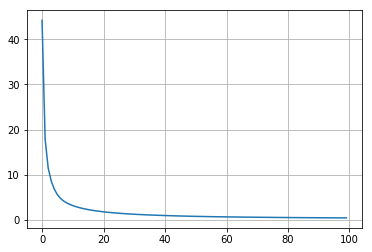

In [8]:
# show energy plot to verify.
%matplotlib inline
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax.plot(range(0,100), E[0:100])
plt.grid()
plt.show()

***